<a href="https://colab.research.google.com/github/youngseo21/esaa_22/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_draft(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트1 YB3조: Movies
## 1. 라이브러리 및 데이터 불러오기
---

In [8]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,963 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline 

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
movies = pd.read_csv('/content/drive/MyDrive/movies_train.csv')

## 2. 탐색적 자료분석(EDA)
---
###1) 일부 데이터 미리보기
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
movies.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
movies.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### 2) 데이터 요약
+ 600개의 데이터와 12개의 변수 

In [ ]:
movies.shape

(600, 12)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


### 3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
movies.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


### 4) 결측치 확인 및 데이터 전처리

In [ ]:
movies.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- dir_prev_bfnum 변수에 결측값이 존재한다.

In [ ]:
# 결측값의 특성 확인
movies[movies['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [4]:
movies['dir_prev_bfnum'].fillna(0, inplace=True)

+ release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [5]:
movies['release_time']=pd.to_datetime(movies['release_time'])

### 5) 데이터 시각화 및 분석

(김서영)

상영시간 별 관객 수

상영시간 별 주연배우 수

상영등급 별 관객 수

상영등급 별 상영시간

#### 5-1) 상영시간 별 관객 수
+ 사용한 변수: `time`, `box_off_num`

Text(0, 0.5, '관객 수')

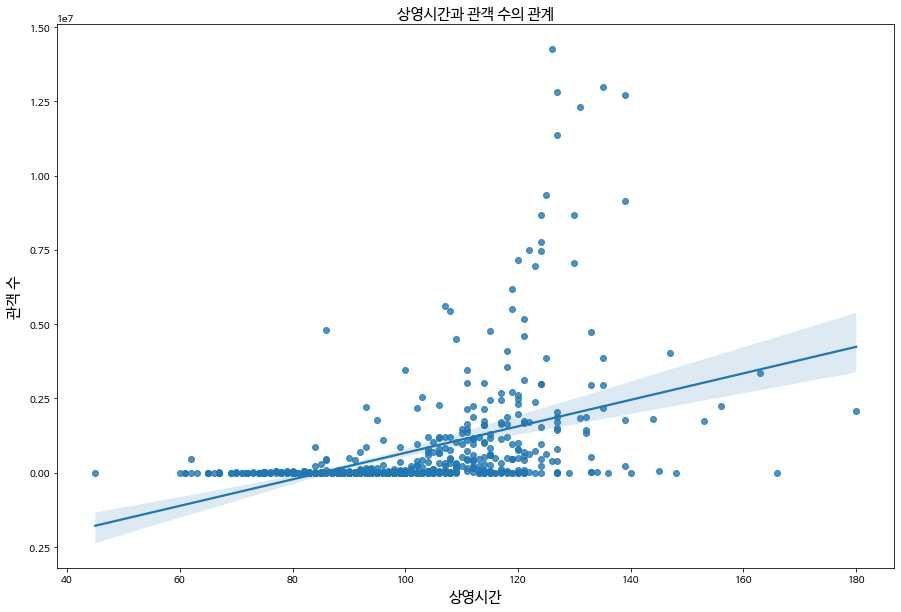

In [ ]:
ax = plt.subplots(figsize = (15,10))
ax = sns.regplot(x = movies.time, y = movies.box_off_num)
ax.set_title('상영시간과 관객 수의 관계', fontsize=15)
ax.set_xlabel('상영시간', fontsize=15)
ax.set_ylabel('관객 수', fontsize=15)

상영시간이 120-140분 사이인 경우 관객수가 높은 영화가 분포함을 알 수 있다. 상영시간이 100분 이하인 경우 급격히 감소함을 알 수 있다. 상영시간이 140분 이상인 경우 역시 높은 관객 수의 영화가 거의 없음을 알 수 있다. 

#### 5-2) 상영시간 별 주연배우 수 
+ 사용한 변수: `time`, `num_actor`

Text(0, 0.5, '주연배우 수')

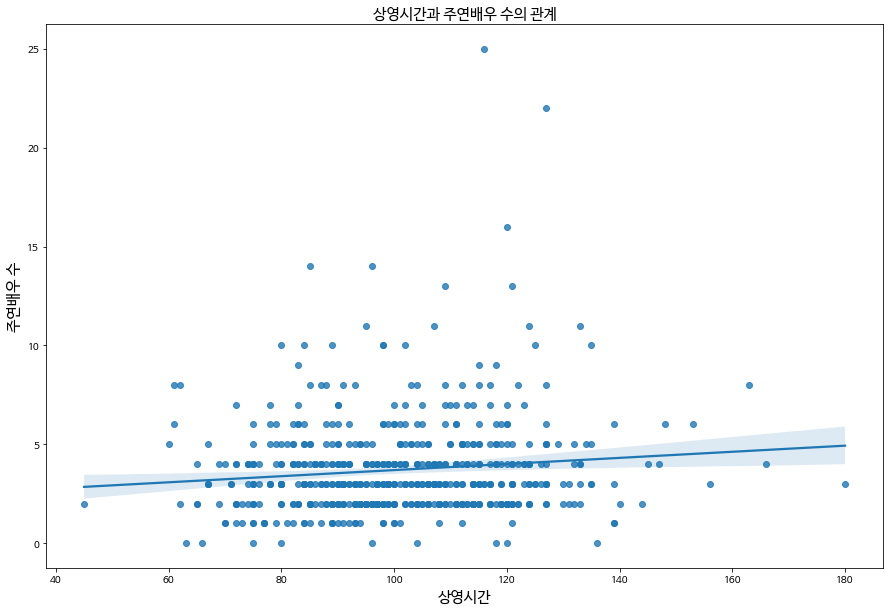

In [ ]:
# 상영시간과 주연배우 수 산점도
ax = plt.subplots(figsize = (15,10))
ax = sns.regplot(x = movies.time, y = movies.num_actor)
ax.set_title('상영시간과 주연배우 수의 관계', fontsize=15)
ax.set_xlabel('상영시간', fontsize=15)
ax.set_ylabel('주연배우 수', fontsize=15)

상영시간과 주연배우의 수 사이의 유의한 상관관계가 없음을 알 수 있다. 

####5-3) 상영등급 별 관객 수

- 사용한 변수: `screening_rat`, `box_off_num`

In [ ]:
# 상영등급 개수 확인
movies['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [ ]:
# 상영등급별 평균 관객 수 구하기
rate_aud = movies.groupby('screening_rat')['box_off_num'].mean()
print(rate_aud)

screening_rat
12세 관람가     8.449809e+05
15세 관람가     1.247519e+06
전체 관람가      1.351005e+05
청소년 관람불가    3.641813e+05
Name: box_off_num, dtype: float64


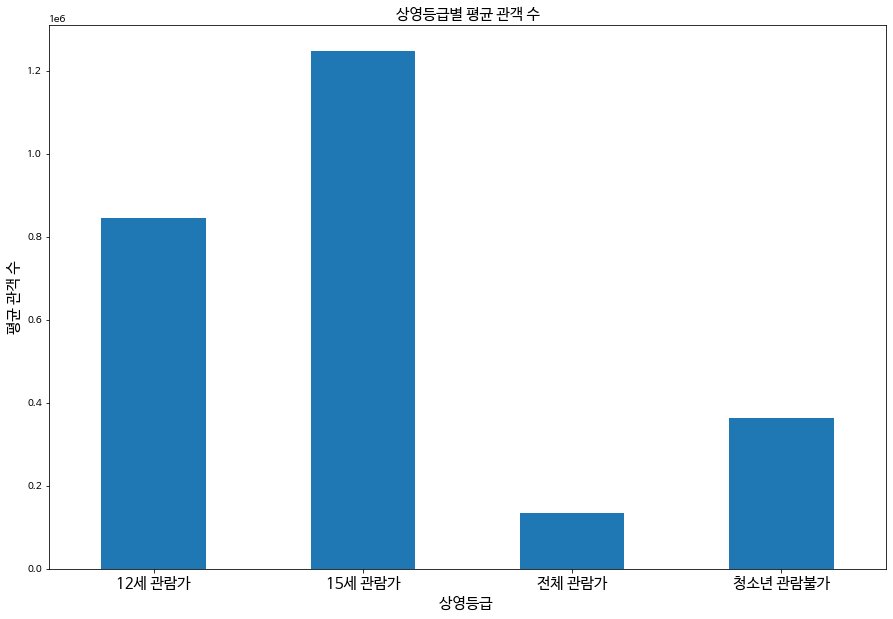

In [ ]:
# barplot
plt.figure(figsize = (15,10))
rate_aud.plot(kind='bar')
plt.title('상영등급별 평균 관객 수', fontsize=15)
plt.xlabel('상영등급', fontsize=15)
plt.ylabel('평균 관객 수', fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

+ 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 평균 관객 수가 많음을 알 수 있다.

#### 5-4) 상영등급 별 상영시간

In [ ]:
rate_time = movies.groupby('screening_rat')['time'].mean()
print(rate_time)

screening_rat
12세 관람가     101.549020
15세 관람가     106.935644
전체 관람가       89.847826
청소년 관람불가     99.475490
Name: time, dtype: float64


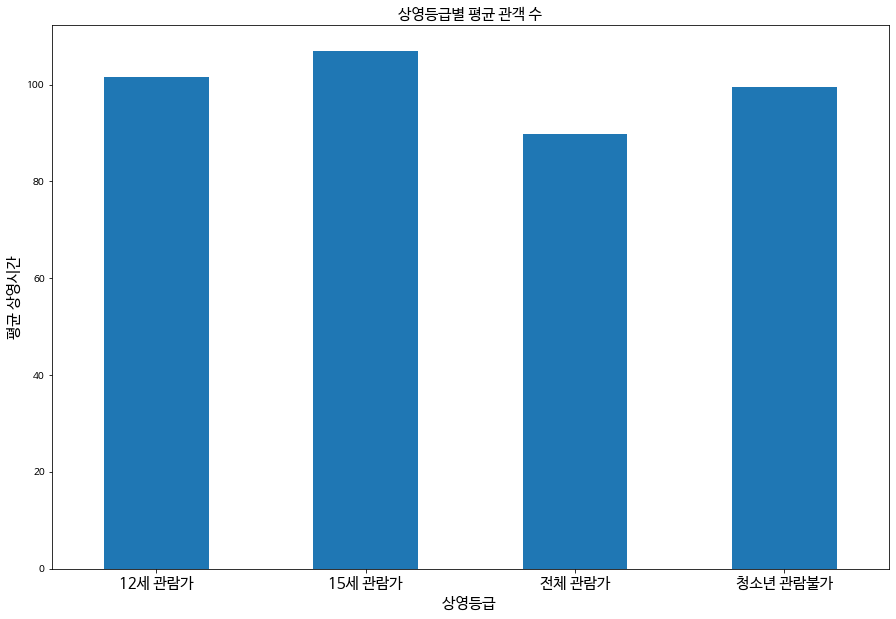

In [ ]:
# barplot
plt.figure(figsize = (15,10))
rate_time.plot(kind='bar')
plt.title('상영등급별 평균 관객 수', fontsize=15)
plt.xlabel('상영등급', fontsize=15)
plt.ylabel('평균 상영시간', fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 평균 상영시간이 길다는 것을 알 수 있다. 이는 어린이와 청소년을 포함한 전체 관람가의 경우 타깃층을 고려해 상영시간이 적다는 점을 보아 타당하다. 

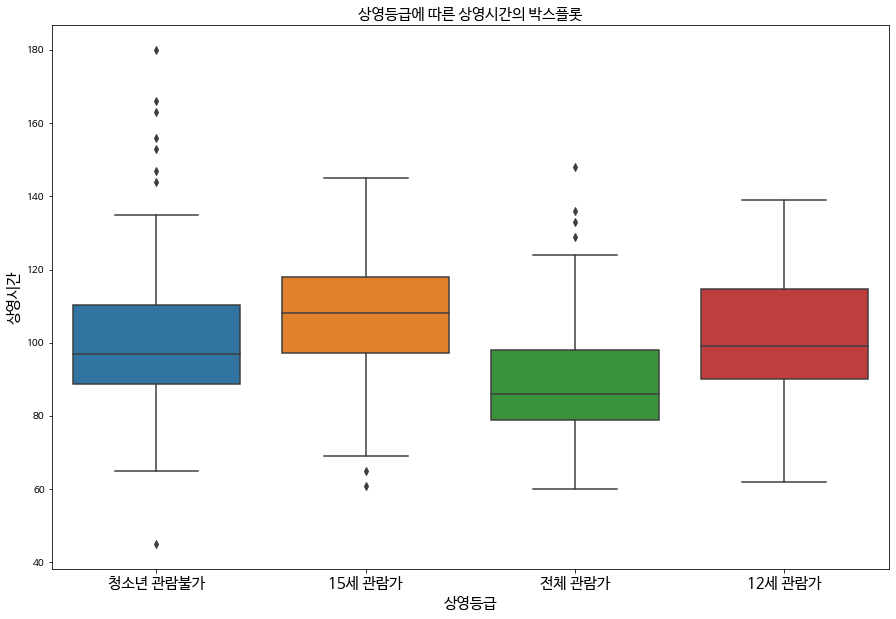

In [6]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x = 'screening_rat', y = 'time',data=movies)
ax.set_title('상영등급에 따른 상영시간의 박스플롯',fontsize=15)
ax.set_xlabel('상영등급',fontsize=15)
ax.set_ylabel('상영시간',fontsize=15)
plt.xticks(rotation=360, fontsize=15)
plt.show()

전체 관람가가 다른 상영등급에 비해 전반적인 상영시간이 짧음을 알 수 있다. 청소년 관람불가의 경우 아웃라이어 점들이 상영시간이 긴 쪽으로 여러개 있다는 것을 보아 상영시간의 variation이 넓음을 알 수 있다. 